# 와인데이터 불러오기

In [1]:
import pandas as pd

In [2]:
red = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')

In [3]:
white = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')

In [4]:
print(red.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [5]:
print(white.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

# 데이터 하나로 합치기

In [6]:
red['type'] = 0
white['type'] = 1
print(red.head(2))
print(white.head(2))

wine = pd.concat([red, white])
print(wine.describe())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70          0.0             1.9      0.076   
1            7.8              0.88          0.0             2.6      0.098   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   

   alcohol  quality  type  
0      9.4        5     0  
1      9.8        5     0  
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   

   free sulfur dioxide  total sulfur dioxide  density   pH  sulphates  \
0                 45.0                 170.0    1.001  3.0       0.45   
1                 14.0                 132.0    0.994  3.3       0.49   

   

# 입력된 데이터 수치 알아보기

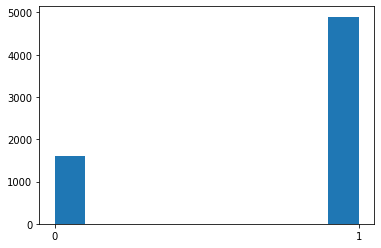

1    4898
0    1599
Name: type, dtype: int64


In [7]:
import matplotlib.pyplot as plt
plt.hist(wine['type'])
plt.xticks([0,1])
plt.show()

print(wine['type'].value_counts())

In [8]:
print(wine.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB
None


# 전처리하기

In [9]:
wine_norm = (wine - wine.min()) / (wine.max() - wine.min())
print(wine_norm.head())
print(wine_norm.describe())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.297521          0.413333     0.000000        0.019939   0.111296   
1       0.330579          0.533333     0.000000        0.030675   0.147841   
2       0.330579          0.453333     0.024096        0.026074   0.137874   
3       0.611570          0.133333     0.337349        0.019939   0.109635   
4       0.297521          0.413333     0.000000        0.019939   0.111296   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.034722              0.064516  0.206092  0.612403   0.191011   
1             0.083333              0.140553  0.186813  0.372093   0.258427   
2             0.048611              0.110599  0.190669  0.418605   0.241573   
3             0.055556              0.124424  0.209948  0.341085   0.202247   
4             0.034722              0.064516  0.206092  0.612403   0.191011   

    alcohol   quality  type  
0  0.202899  0.333333   0.

# 데이터를 섞어서 랜덤으로 만든다.

In [10]:
import numpy as np
wine_shuffle = wine_norm.sample(frac=1)
print(wine_shuffle.head())

wine_np = wine_shuffle.to_numpy()
print(wine_np[:5])

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
459        0.644628          0.333333     0.397590        0.024540   0.107973   
1581       0.429752          0.146667     0.295181        0.101227   0.049834   
3879       0.247934          0.433333     0.120482        0.092025   0.074751   
466        0.264463          0.040000     0.192771        0.128834   0.049834   
3527       0.314050          0.100000     0.174699        0.122699   0.073090   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
459              0.031250              0.094470  0.263929  0.410853   
1581             0.107639              0.179724  0.128976  0.170543   
3879             0.083333              0.135945  0.118180  0.310078   
466              0.184028              0.311060  0.163678  0.387597   
3527             0.222222              0.322581  0.177174  0.302326   

      sulphates   alcohol   quality  type  
459    0.196629  0.144928  0.000000   0.0 

In [11]:
import tensorflow as tf
train_idx = int(len(wine_np) * 0.8)
train_X, train_Y = wine_np[:train_idx, :-1], wine_np[:train_idx, -1]
test_X, test_Y = wine_np[train_idx:, :-1], wine_np[train_idx:, -1]

In [12]:
print(train_X[0])
print(train_Y[0])
print(test_X[0])
print(test_Y[0])

[0.6446281  0.33333333 0.39759036 0.02453988 0.10797342 0.03125
 0.09447005 0.26392905 0.41085271 0.19662921 0.14492754 0.        ]
0.0
[0.28099174 0.10666667 0.21686747 0.02147239 0.03322259 0.06944444
 0.13133641 0.07036823 0.31782946 0.23033708 0.65217391 0.5       ]
1.0


In [13]:
train_Y = tf.keras.utils.to_categorical(train_Y, num_classes=2)
test_Y = tf.keras.utils.to_categorical(test_Y, num_classes=2)
print(train_Y[0])
print(test_Y[0])

[1. 0.]
[0. 1.]


In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=48, activation='relu', input_shape=(12,)),
    tf.keras.layers.Dense(units=24, activation='relu'),
    tf.keras.layers.Dense(units=12, activation='relu'),
    tf.keras.layers.Dense(units=2, activation='softmax')
])

Metal device set to: Apple M1


2021-12-31 06:34:58.603053: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-12-31 06:34:58.603533: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [15]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 48)                624       
                                                                 
 dense_1 (Dense)             (None, 24)                1176      
                                                                 
 dense_2 (Dense)             (None, 12)                300       
                                                                 
 dense_3 (Dense)             (None, 2)                 26        
                                                                 
Total params: 2,126
Trainable params: 2,126
Non-trainable params: 0
_________________________________________________________________


/opt/homebrew/Caskroom/miniforge/base/envs/p39t27/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [16]:
history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25)

2021-12-31 06:35:01.113460: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2021-12-31 06:35:01.246459: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/25
122/122 [==============================] - ETA: 0s - loss: 0.1575 - accuracy: 0.9425

2021-12-31 06:35:02.193048: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


122/122 [==============================] - 1s 9ms/step - loss: 0.1575 - accuracy: 0.9425 - val_loss: 0.0930 - val_accuracy: 0.9708
Epoch 2/25
122/122 [==============================] - 1s 8ms/step - loss: 0.0539 - accuracy: 0.9849 - val_loss: 0.0510 - val_accuracy: 0.9869
Epoch 3/25
122/122 [==============================] - 1s 8ms/step - loss: 0.0387 - accuracy: 0.9908 - val_loss: 0.0538 - val_accuracy: 0.9869
Epoch 4/25
122/122 [==============================] - 1s 8ms/step - loss: 0.0459 - accuracy: 0.9887 - val_loss: 0.0775 - val_accuracy: 0.9731
Epoch 5/25
122/122 [==============================] - 1s 8ms/step - loss: 0.0449 - accuracy: 0.9872 - val_loss: 0.0691 - val_accuracy: 0.9777
Epoch 6/25
122/122 [==============================] - 1s 8ms/step - loss: 0.0381 - accuracy: 0.9897 - val_loss: 0.0847 - val_accuracy: 0.9746
Epoch 7/25
122/122 [==============================] - 1s 9ms/step - loss: 0.0401 - accuracy: 0.9895 - val_loss: 0.0450 - val_accuracy: 0.9908
Epoch 8/25
122/12

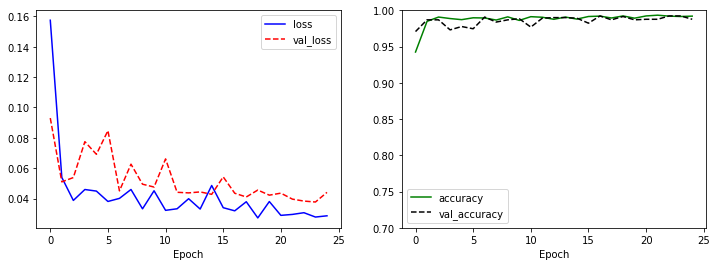

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

In [18]:
model.evaluate(test_X, test_Y)

41/41 [==============================] - 0s 6ms/step - loss: 0.0422 - accuracy: 0.9908


[0.04224217310547829, 0.9907692074775696]

In [19]:
# 다향분석
print(wine['quality'].describe())
print(wine['quality'].value_counts())

count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64


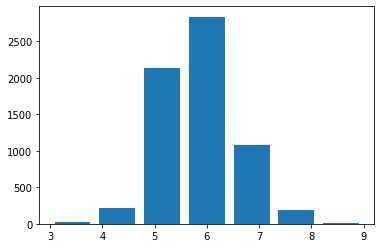

In [20]:
import matplotlib.pyplot as plt
plt.hist(wine['quality'], bins=7, rwidth=0.8)
plt.show()

In [21]:
wine.loc[wine['quality'] <= 5, 'new_quality'] = 0
wine.loc[wine['quality'] == 6, 'new_quality'] = 1
wine.loc[wine['quality'] >= 7, 'new_quality'] = 2

In [22]:
print(wine['new_quality'].describe())
print(wine['new_quality'].value_counts())

count    6497.000000
mean        0.829614
std         0.731124
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: new_quality, dtype: float64
1.0    2836
0.0    2384
2.0    1277
Name: new_quality, dtype: int64


In [23]:
data = [['Apple', 11], ['Banana', 23], ['Coconut', 35]]
df = pd.DataFrame(data, columns=['Fruit', 'Count'])
print(df)
print()
print(df.loc[0])
print()
print(df.loc[0,'Fruit'])

     Fruit  Count
0    Apple     11
1   Banana     23
2  Coconut     35

Fruit    Apple
Count       11
Name: 0, dtype: object

Apple


In [24]:
del wine['quality']
wine_norm = (wine - wine.min()) / (wine.max() - wine.min())
wine_shuffle = wine_norm.sample(frac=1)
wine_np = wine_shuffle.to_numpy()

train_idx = int(len(wine_np) * 0.8)
train_X, train_Y = wine_np[:train_idx, :-1], wine_np[:train_idx, -1]
test_X, test_Y = wine_np[train_idx:, :-1], wine_np[train_idx:, -1]
train_Y = tf.keras.utils.to_categorical(train_Y, num_classes=3)
test_Y = tf.keras.utils.to_categorical(test_Y, num_classes=3)

In [26]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=48, activation='relu', input_shape=(12,)),
    tf.keras.layers.Dense(units=24, activation='relu'),
    tf.keras.layers.Dense(units=12, activation='relu'),
    tf.keras.layers.Dense(units=3, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25)

/opt/homebrew/Caskroom/miniforge/base/envs/p39t27/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
2021-12-31 08:01:04.658287: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/25
122/122 [==============================] - ETA: 0s - loss: 0.4730 - accuracy: 0.7947

2021-12-31 08:01:05.815859: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


122/122 [==============================] - 1s 10ms/step - loss: 0.4730 - accuracy: 0.7947 - val_loss: 0.4522 - val_accuracy: 0.8038
Epoch 2/25
122/122 [==============================] - 1s 9ms/step - loss: 0.4083 - accuracy: 0.8009 - val_loss: 0.4291 - val_accuracy: 0.8038
Epoch 3/25
122/122 [==============================] - 1s 9ms/step - loss: 0.4039 - accuracy: 0.7968 - val_loss: 0.4445 - val_accuracy: 0.8038
Epoch 4/25
122/122 [==============================] - 1s 9ms/step - loss: 0.4029 - accuracy: 0.8014 - val_loss: 0.4608 - val_accuracy: 0.8162
Epoch 5/25
122/122 [==============================] - 1s 9ms/step - loss: 0.4061 - accuracy: 0.8050 - val_loss: 0.4348 - val_accuracy: 0.8038
Epoch 6/25
122/122 [==============================] - 1s 9ms/step - loss: 0.4074 - accuracy: 0.8006 - val_loss: 0.4280 - val_accuracy: 0.8038
Epoch 7/25
122/122 [==============================] - 1s 9ms/step - loss: 0.4041 - accuracy: 0.8032 - val_loss: 0.4258 - val_accuracy: 0.8038
Epoch 8/25
122/1

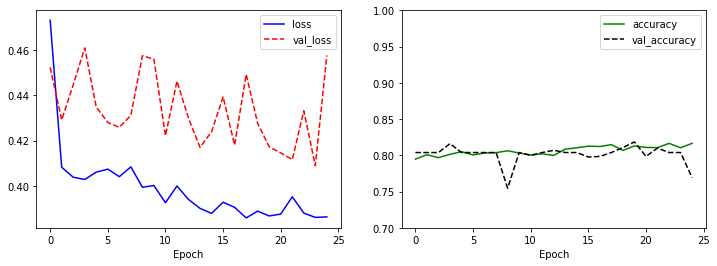

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

In [28]:
model.evaluate(test_X, test_Y)

41/41 [==============================] - 0s 6ms/step - loss: 0.4478 - accuracy: 0.7931


[0.4478406310081482, 0.7930769324302673]